<a href="https://colab.research.google.com/github/ihzagobah/Tubes/blob/main/Ta_Ihza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import os
import csv

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/sinyal/"

Sinyal_AS  Sinyal_MR  Sinyal_MS  Sinyal_MVP  Sinyal_N


In [ ]:
header = 'filename'
header += ' label'
header = header.split()

In [ ]:
file = open('sinyal.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'Sinyal_AS Sinyal_MR Sinyal_MVP Sinyal_N Sinyal_MS'.split()
for g in genres:
    for filename in os.listdir(f'/content/gdrive/My Drive/sinyal/{g}'):
        songname = f'/content/gdrive/My Drive/sinyal/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=1)
        to_append = f'{filename}'   
        to_append += f' {g}' 
        file = open('sinyal.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
data = pd.read_csv('sinyal.csv')
data.head()

,filename,label
0,New_AS_002.wav,Sinyal_AS
1,New_AS_003.wav,Sinyal_AS
2,New_AS_004.wav,Sinyal_AS
3,New_AS_005.wav,Sinyal_AS
4,New_AS_006.wav,Sinyal_AS


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = ('Sinyal_AS,Sinyal_MR,Sinyal_MVP,Sinyal_N,Sinyal_MS')
le = LabelEncoder()
data['classID'] = le.fit_transform(data['label'])
data.head(1000)

,filename,label,classID
0,New_AS_002.wav,Sinyal_AS,0
1,New_AS_003.wav,Sinyal_AS,0
2,New_AS_004.wav,Sinyal_AS,0
3,New_AS_005.wav,Sinyal_AS,0
4,New_AS_006.wav,Sinyal_AS,0
...,...,...,...
995,New_MS_196.wav,Sinyal_MS,2
996,New_MS_197.wav,Sinyal_MS,2
997,New_MS_198.wav,Sinyal_MS,2
998,New_MS_199.wav,Sinyal_MS,2


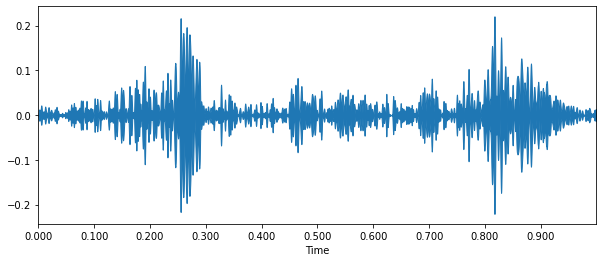

In [ ]:
#contoh sinyal MR
import matplotlib.pyplot as plt
y, sr = librosa.load('/content/gdrive/My Drive/sinyal/Sinyal_MR/New_MR_005.wav',duration=1)
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
librosa.display.waveplot(y, sr=sr)

In [ ]:
y, sr = librosa.load('/content/gdrive/My Drive/sinyal/Sinyal_MR/New_MR_078.wav',duration=1)
s1 = librosa.feature.melspectrogram(y=y, sr=sr)
s1.shape

(128, 44)

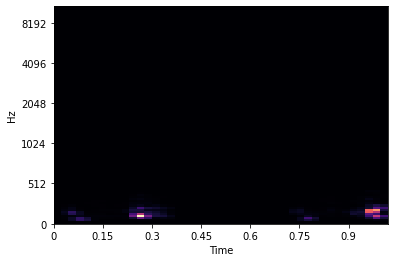

In [ ]:
librosa.display.specshow(s1, y_axis='mel', x_axis='time')

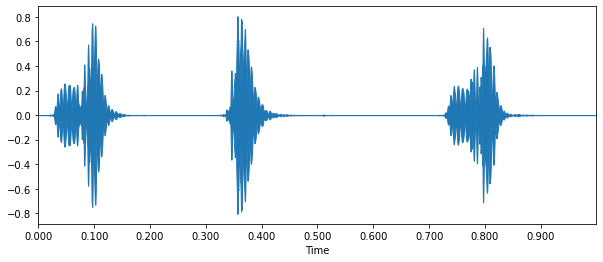

In [ ]:
#contoh sinyal N
import matplotlib.pyplot as plt
y, sr = librosa.load('/content/gdrive/My Drive/sinyal/Sinyal_N/New_N_005.wav',duration=1)
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
librosa.display.waveplot(y, sr=sr)

In [ ]:
y, sr = librosa.load('/content/gdrive/My Drive/sinyal/Sinyal_N/New_N_005.wav',duration=1)
s2 = librosa.feature.melspectrogram(y=y, sr=sr)
s2.shape

(128, 44)

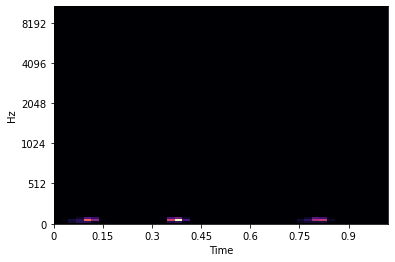

In [ ]:
librosa.display.specshow(s2, y_axis='mel', x_axis='time')

In [ ]:
valid_data = data[['filename','label','classID']]
valid_data.head()

,filename,label,classID
0,New_AS_002.wav,Sinyal_AS,0
1,New_AS_003.wav,Sinyal_AS,0
2,New_AS_004.wav,Sinyal_AS,0
3,New_AS_005.wav,Sinyal_AS,0
4,New_AS_006.wav,Sinyal_AS,0


In [ ]:
valid_data['path'] = valid_data['label'].astype('str') + '/' + valid_data['filename'].astype('str')
valid_data.head()

,filename,label,classID,path
0,New_AS_002.wav,Sinyal_AS,0,Sinyal_AS/New_AS_002.wav
1,New_AS_003.wav,Sinyal_AS,0,Sinyal_AS/New_AS_003.wav
2,New_AS_004.wav,Sinyal_AS,0,Sinyal_AS/New_AS_004.wav
3,New_AS_005.wav,Sinyal_AS,0,Sinyal_AS/New_AS_005.wav
4,New_AS_006.wav,Sinyal_AS,0,Sinyal_AS/New_AS_006.wav


In [ ]:
D = [] #dataset

for row in valid_data.itertuples():
    y, sr = librosa.load('/content/gdrive/My Drive/sinyal/' + row.path, duration=1)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 44): continue
    D.append((ps, row.classID))

In [ ]:
print("jumlah sample :", len(D))

jumlah sample : 1000


In [ ]:
dataset = D
random.shuffle(dataset)

train = dataset[:800]
test = dataset[800:]

x_train, y_train = zip(*train)
x_test, y_test = zip(*test)

#reshape untuk input cnn
x_train = np.array([x.reshape( (128,44,1)) for x in x_train])
x_test = np.array([x.reshape( (128,44,1)) for x in x_test])

#one-hot encoding
y_train = np_utils.to_categorical(y_train,5)
y_test = np_utils.to_categorical(y_test,5)

In [ ]:
y_train.shape

(800, 5)

In [ ]:
model = Sequential()
input_shape =(128,44,1)

model.add(Conv2D(24, (5,5), strides=(1,1), input_shape=input_shape))
model.add(MaxPooling2D((4,2),strides=(4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5,5), padding='valid'))
model.add(MaxPooling2D((4,2), strides=(4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5,5), padding='valid'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(44))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(
    x=x_train,
    y=y_train,
    epochs=12,
    batch_size=5,
    validation_data=(x_test,y_test))

score = model.evaluate(
    x=x_test,
    y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
160/160 [==============================] - 6s 33ms/step - loss: 0.3030 - accuracy: 0.8724 - val_loss: 0.3318 - val_accuracy: 0.9250
Epoch 2/12
160/160 [==============================] - 5s 31ms/step - loss: 0.3091 - accuracy: 0.9235 - val_loss: 0.2420 - val_accuracy: 0.9350
Epoch 3/12
160/160 [==============================] - 5s 31ms/step - loss: 0.2669 - accuracy: 0.9011 - val_loss: 0.2622 - val_accuracy: 0.9350
Epoch 4/12
160/160 [==============================] - 5s 31ms/step - loss: 0.1795 - accuracy: 0.9366 - val_loss: 0.6709 - val_accuracy: 0.8650
Epoch 5/12
160/160 [==============================] - 5s 31ms/step - loss: 0.4733 - accuracy: 0.9037 - val_loss: 0.2317 - val_accuracy: 0.9500
Epoch 6/12
160/160 [==============================] - 5s 30ms/step - loss: 0.2507 - accuracy: 0.9317 - val_loss: 0.2388 - val_accuracy: 0.9300
Epoch 7/12
160/160 [==============================] - 5s 31ms/step - loss: 0.1694 - accuracy: 0.9273 - val_loss: 0.2140 - val_accuracy: 0.9450